In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iith-foml-2020/iith_foml_2020_test.csv
/kaggle/input/iith-foml-2020/iith_foml_2020_sample.csv
/kaggle/input/iith-foml-2020/iith_foml_2020_train.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("/kaggle/input/iith-foml-2020/iith_foml_2020_train.csv")
test=pd.read_csv("/kaggle/input/iith-foml-2020/iith_foml_2020_test.csv")
train.iloc[:,8:18]=train.iloc[:,8:18].fillna(train.iloc[:,8:18].mean())
test.iloc[:,8:18]=test.iloc[:,8:18].fillna(test.iloc[:,8:18].mean())
train.iloc[:,23]=train.iloc[:,23].fillna(train.iloc[:,23].mean())
y=train.iloc[:,24]
x=train.drop(['Target Variable (Discrete)','Feature 23 (Discrete)','Feature 14'],axis=1)
oxtest=test.drop(['Feature 23 (Discrete)','Feature 14'],axis=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import  cross_val_score

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x,y)

In [5]:
clf.best_params_

NameError: name 'clf' is not defined

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [7]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth= 7,random_state=1)

In [8]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

In [9]:
dt.score(x_test,y_test)

0.8844221105527639

In [10]:
y1=dt.predict(oxtest)

In [11]:
from sklearn.ensemble import RandomForestClassifier 

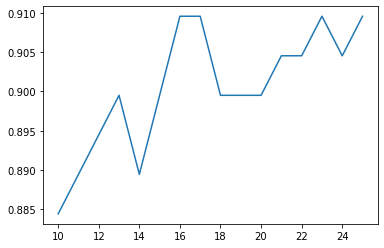

In [12]:
score_list = []
for i in range(10,26):
    rftest = RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
    rftest.fit(x_train,y_train)

    score_list.append(rftest.score(x_test,y_test))
    
plt.plot(range(10,26),score_list)

In [13]:
rf = RandomForestClassifier(n_estimators=17,criterion="gini",random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
y2=rf.predict(oxtest)

In [14]:
rf2 = RandomForestClassifier(n_estimators=17,criterion="gini",random_state=42)
rf2.fit(x,y)
rf2.score(x,y)
y3=rf2.predict(oxtest)

In [15]:
x=(x-np.mean(x))/np.std(x)
oxtest=(oxtest-np.mean(oxtest))/np.std(oxtest)

In [16]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
xs=x[(x > (Q1 - 1.5 * IQR)) |(x < (Q3 + 1.5 * IQR))]
xs=x.fillna(xs.median())

In [17]:
from sklearn.model_selection import train_test_split
x_trains, x_tests, y_train, y_test = train_test_split(xs,y,test_size = 0.2,random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


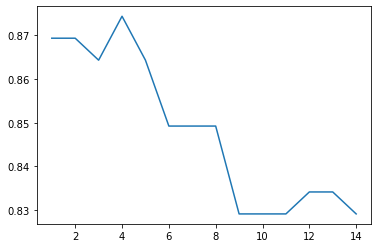

In [19]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each, weights='distance',p=1)
    knn2.fit(x_trains,y_train)
    score_list.append(knn2.score(x_tests,y_test))
    
plt.plot(range(1,15),score_list)

In [20]:
knn3 = KNeighborsClassifier(n_neighbors = 4, weights='distance',p=1)

In [21]:
knn3.fit(x_trains,y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [22]:
knn3.score(x_tests,y_test)

0.8743718592964824

In [23]:
y4=knn3.predict(oxtest)

In [24]:
from sklearn.utils.extmath import weighted_mode

In [25]:
w1=[1.0]*426
w2=[1.1]*426
w3=[1.2]*426
w4=[1.05]*426
x=[y1,y2,y3,y4]
weights = [w1,w2,w3,w4]
yo=weighted_mode(x, weights)
yo=yo[0][0].astype('int')

In [26]:
yo

array([ 6,  2,  1,  1,  1,  2,  1,  5,  1,  0,  1,  6,  0,  1,  2,  0,  1,
        1,  1,  1,  5,  2,  1,  1,  0,  0,  6,  0,  1,  0, 13,  1,  1,  6,
        1,  0,  6,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  6,  1,  1,
        1,  1,  1,  1,  1,  6,  2,  0,  0,  1,  1,  1,  6,  1,  1,  2,  2,
        1,  2,  1,  2,  1,  1,  6,  1,  1,  1,  1,  1,  5,  1,  0,  1,  6,
        0,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  0,  1,  2,  0,  1,  0,
        0,  1,  1,  1,  1,  0,  0,  2,  1,  0,  0,  0,  0,  6,  0,  1,  2,
        1,  0,  1,  1,  1,  6,  1,  1,  1,  2,  1,  1,  1,  1,  0,  0,  2,
        2,  2,  1,  0,  0,  1,  0,  2,  1,  1,  6,  2,  2,  0,  1,  1,  6,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  2,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  2,  5,  1,  1,  2,  1,  1,
        2,  1,  1,  5,  0,  2,  6,  1,  1,  0,  2,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  0,  0,  0,  2,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  6

In [27]:

Index=range(1,427)
dme={"Id":Index,"Category":yo}
ansme=pd.DataFrame(data=dme)
filename = 'mergedall.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: mergedall.csv
